In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pickle

In [60]:
path = r'/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
#     print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    df['params'] = "{"+filename.split("_{")[-1][:-4]
    li.append(df)

total_frame = pd.concat(li, axis=0, ignore_index=True)

total_frame.head()

,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,...,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted,params
0,0,324652.86,223474.41,23300.555309,29579.745224,3154.551065,165604.866874,8078.16,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,1.231083e+10,88.229712,1187.089907,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ..."
1,1,229534.20,198485.92,23464.752699,29595.668288,3122.286319,165604.866874,1884.71,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,6.945128e+09,55.085872,923.771508,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ..."
2,2,353942.46,195018.61,21601.843042,29224.130128,1658.945670,165604.866874,12183.20,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,1.603366e+10,91.280861,1191.384811,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ..."
3,3,363324.00,208966.06,23278.203832,29656.706700,3188.160175,165604.866874,13192.97,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,3.352380e+10,110.944281,1245.402612,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ..."
4,4,136551.84,146665.87,22191.845222,29595.668288,3116.600720,148459.399850,0.00,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,2.049940e+10,42.642955,604.470164,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ..."


In [72]:
total_frame.groupby('params').Carbon_emitted.mean()

params
{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}       1009.256046
{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}     970.917739
{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}         973.583506
{"C": 0.1, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}      941.022025
{"C": 2, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}         1003.615459
{"C": 2, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}      1015.633864
{"C": 2, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}           980.373592
{"C": 2, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}        991.059337
Name: Carbon_emitted, dtype: float64

In [62]:
total_frame.groupby('params').Electricity_cost.mean()

params
{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}       43.283102
{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}    42.593877
{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}        42.133633
{"C": 0.1, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}     41.918422
{"C": 2, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}         42.148383
{"C": 2, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}      42.293900
{"C": 2, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}          43.024119
{"C": 2, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}       42.740109
Name: Electricity_cost, dtype: float64

In [63]:
results_dict = pickle.load( open( '/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/results/demand_initial_exploration-2020-04-18-21-53-51.7447140100.csv', "rb" ) )
results_dict = pd.DataFrame.from_dict((results_dict))

In [64]:
def get_metric(results_dict, metric):
    hold_dat = {}
    for res in results_dict:
        hold_frame = []
        for i in range(len(results_dict['{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}'])):
             hold_frame.append(results_dict[res][i][metric])
        hold_dat[res] = hold_frame

    results_df = pd.DataFrame(hold_dat)
    return results_df

In [65]:
results_metrics = get_metric(results_dict, "median_absolute_error")
results_metrics

,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": 1, ""shuffle"": false, ""tol"": 0.001}","{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": 10, ""shuffle"": false, ""tol"": 0.001}","{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": 100, ""shuffle"": false, ""tol"": 0.001}","{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": 1000, ""shuffle"": false, ""tol"": 0.001}","{""C"": 0.1, ""fit_intercept"": false, ""max_iter"": 1, ""shuffle"": false, ""tol"": 0.001}","{""C"": 0.1, ""fit_intercept"": false, ""max_iter"": 10, ""shuffle"": false, ""tol"": 0.001}","{""C"": 0.1, ""fit_intercept"": false, ""max_iter"": 100, ""shuffle"": false, ""tol"": 0.001}","{""C"": 0.1, ""fit_intercept"": false, ""max_iter"": 1000, ""shuffle"": false, ""tol"": 0.001}","{""C"": 1, ""fit_intercept"": true, ""max_iter"": 1, ""shuffle"": false, ""tol"": 0.001}","{""C"": 1, ""fit_intercept"": true, ""max_iter"": 10, ""shuffle"": false, ""tol"": 0.001}",...,"{""hidden_layer_sizes"": 10, ""learning_rate"": ""constant"", ""solver"": ""adam""}","{""hidden_layer_sizes"": 10, ""learning_rate"": ""adaptive"", ""solver"": ""adam""}","{""hidden_layer_sizes"": [10, 50], ""learning_rate"": ""constant"", ""solver"": ""adam""}","{""hidden_layer_sizes"": [10, 50], ""learning_rate"": ""adaptive"", ""solver"": ""adam""}","{""hidden_layer_sizes"": 50, ""learning_rate"": ""constant"", ""solver"": ""adam""}","{""hidden_layer_sizes"": 50, ""learning_rate"": ""adaptive"", ""solver"": ""adam""}","{""hidden_layer_sizes"": [10, 50, 100], ""learning_rate"": ""constant"", ""solver"": ""adam""}","{""hidden_layer_sizes"": [10, 50, 100], ""learning_rate"": ""adaptive"", ""solver"": ""adam""}","{""hidden_layer_sizes"": 20, ""learning_rate"": ""constant"", ""solver"": ""adam""}","{""hidden_layer_sizes"": 20, ""learning_rate"": ""adaptive"", ""solver"": ""adam""}"
0,7423.690230,7423.690230,7423.690230,7423.690230,9264.162499,9264.162499,9264.162499,9264.162499,1459.321975,1459.321975,...,2006.292729,1976.674268,1980.800106,1976.822075,1984.761957,1974.737577,1989.300813,1951.659725,1985.585791,1999.413047
1,7379.767508,7379.767508,7379.767508,7379.767508,9261.717266,9261.717266,9261.717266,9261.717266,1479.765935,1479.765935,...,2001.766878,1995.576590,1997.829934,1975.656562,1980.932653,1962.924122,1958.631736,1984.011404,2010.216000,1998.684149
2,7366.851765,7366.851765,7366.851765,7366.851765,9294.522632,9294.522632,9294.522632,9294.522632,1491.700914,1491.700914,...,1992.331466,2015.136713,2004.319157,2017.389529,2000.092135,1976.940737,2010.493451,1983.256595,1997.628037,1999.510035
3,7343.025700,7343.025700,7343.025700,7343.025700,9279.762781,9279.762781,9279.762781,9279.762781,1546.046992,1546.046992,...,2044.003627,2053.747378,2054.115592,2040.578562,2037.738844,1994.062500,2050.833943,1995.300393,2029.211532,2013.635247
4,7398.655240,7398.655240,7398.655240,7398.655240,9295.768247,9295.768247,9295.768247,9295.768247,1588.928349,1588.928349,...,2034.227655,2037.934407,2073.974296,2073.990554,2056.780241,2064.305121,2062.323679,2032.539973,2062.069180,2061.339028
5,7359.671845,7359.671845,7359.671845,7359.671845,9235.631954,9235.631954,9235.631954,9235.631954,1624.868197,1624.868197,...,2088.508201,2098.611426,2058.641208,2079.424570,2067.324506,2061.649869,2086.489872,2087.786463,2077.975816,2077.240627
6,7365.675365,7365.675365,7365.675365,7365.675365,9280.653869,9280.653869,9280.653869,9280.653869,1649.166251,1649.166251,...,2103.053297,2106.001357,2117.601212,2104.359861,2103.422998,2094.653450,2082.430817,2072.132841,2108.477171,2092.218021
7,7379.748319,7379.748319,7379.748319,7379.748319,9220.706169,9220.706169,9220.706169,9220.706169,1665.335542,1665.335542,...,2109.652343,2105.785235,2121.446378,2102.131945,2137.339311,2104.892687,2112.146849,2116.324355,2118.743033,2146.015331
8,7423.467462,7423.467462,7423.467462,7423.467462,9233.610725,9233.610725,9233.610725,9233.610725,1687.437216,1687.437216,...,2125.360435,2163.588844,2145.191169,2135.314276,2135.474045,2156

In [66]:
results_metrics.mean()

{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}        7648.049795
{"C": 0.1, "fit_intercept": true, "max_iter": 10, "shuffle": false, "tol": 0.001}       7648.049795
{"C": 0.1, "fit_intercept": true, "max_iter": 100, "shuffle": false, "tol": 0.001}      7648.049795
{"C": 0.1, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}     7648.049795
{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}       9503.368829
{"C": 0.1, "fit_intercept": false, "max_iter": 10, "shuffle": false, "tol": 0.001}      9503.368829
{"C": 0.1, "fit_intercept": false, "max_iter": 100, "shuffle": false, "tol": 0.001}     9503.368829
{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}    9503.368829
{"C": 1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}          1553.981700
{"C": 1, "fit_intercept": true, "max_iter": 10, "shuffle": false, "tol": 0.001}         1553.981700


In [70]:
joined_df = total_frame.set_index('params').join(results_metrics.mean().to_frame())
joined_df.head()

,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,...,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted,0
"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"": 1, ""shuffle"": false, ""tol"": 0.001}",0,306932.70,239410.29,23300.555309,29579.745224,3154.551065,165604.866874,10447.87,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,1.253054e+10,87.457669,1191.440575,9503.368829
"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"": 1, ""shuffle"": false, ""tol"": 0.001}",1,214244.28,216939.53,23464.752699,29595.668288,3122.286319,165604.866874,1884.71,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,6.818218e+09,55.160993,926.705801,9503.368829
"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"": 1, ""shuffle"": false, ""tol"": 0.001}",2,343491.60,204808.29,21601.843042,29224.130128,1658.945670,165604.866874,13135.74,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,1.604295e+10,90.772797,1193.947894,9503.368829
"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"": 1, ""shuffle"": false, ""tol"": 0.001}",3,345568.80,228578.60,23278.203832,29656.706700,3188.160175,165604.866874,13192.97,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,3.348648e+10,109.372461,1252.198769,9503.368829
"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"": 1, ""shuffle"": false, ""tol"": 0.001}",4,142010.94,142412.51,22191.845222,29595.668288,3116.600720,148459.399850,0.00,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,1.989626e+10,43.245894,606.061198,9503.368829


correlations = joined_df.groupby(joined_df.index).Carbon_emitted.mean()

correlations = pd.concat([joined_df.groupby(joined_df.index).Carbon_emitted.mean(), results_metrics.mean()], axis=1).reset_index()
correlations = correlations.dropna()
correlations = correlations.rename({0: "absolute_median_error"}, axis=1)

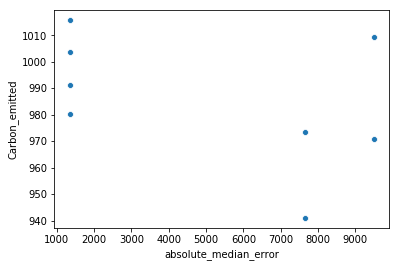

In [84]:
sns.scatterplot(data = correlations, y="Carbon_emitted", x="absolute_median_error")

# Visualise results

In [118]:
results_dict['{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}'].iloc[0]

{'median_absolute_error': 7423.690230130251,
 'mean_squared_error': 280592024.0511837,
 'mean_absolute_error': 12346.327822366233,
 'root_mean_squared_error': 16750.88129177637}

In [116]:
def get_results_mean(error_metric, output_metric):
#     total_frame.groupby('params')[error_metric].mean()

    correlations = joined_df.groupby(joined_df.index)[output_metric].mean()
    results_metrics = get_metric(results_dict, error_metric)
    results_metrics
    
    correlations = pd.concat([joined_df.groupby(joined_df.index)[output_metric].mean(), results_metrics.mean()], axis=1).reset_index()
    correlations = correlations.dropna()
    correlations = correlations.rename({0: error_metric}, axis=1)
    
    sns.scatterplot(data = correlations, x= error_metric, y=output_metric)
    plt.show()
    plt.close()
    
    return correlations

/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


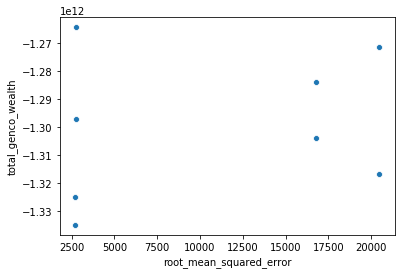

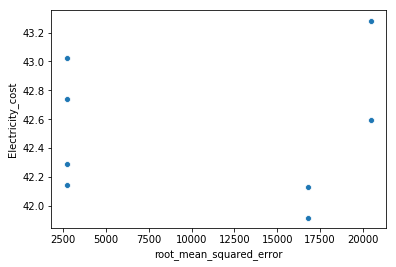

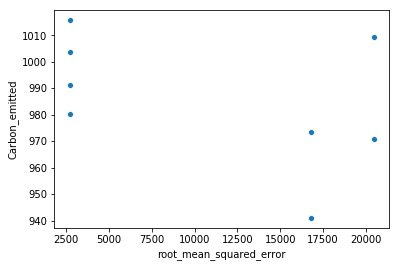

In [117]:
for output_metric in ['total_genco_wealth', 'Electricity_cost', 'Carbon_emitted']:
    get_results_mean('root_mean_squared_error', output_metric)

In [130]:
# def get_results_over_time(error_metric, output_metric):

#     correlations = joined_df.groupby(joined_df.index)[output_metric].mean()
#     results_metrics = get_metric(results_dict, error_metric)
#     results_metrics
    
#     correlations = pd.concat([joined_df.groupby(joined_df.index)[output_metric], results_metrics.mean()], axis=1).reset_index()
#     correlations = correlations.dropna()
#     correlations = correlations.rename({0: error_metric}, axis=1)
    
#     sns.scatterplot(data = correlations, x= error_metric, y=output_metric)
#     plt.show()
#     plt.close()
    
#     return correlations


# joined_df.columns.str.contains("contributed_")
joined_df.reset_index()

,index,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,...,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted,0
0,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":...",0,306932.70,239410.29,23300.555309,29579.745224,3.154551e+03,165604.866874,10447.87,0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,1.253054e+10,87.457669,1191.440575,9503.368829
1,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":...",1,214244.28,216939.53,23464.752699,29595.668288,3.122286e+03,165604.866874,1884.71,0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,6.818218e+09,55.160993,926.705801,9503.368829
2,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":...",2,343491.60,204808.29,21601.843042,29224.130128,1.658946e+03,165604.866874,13135.74,0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,1.604295e+10,90.772797,1193.947894,9503.368829
3,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":...",3,345568.80,228578.60,23278.203832,29656.706700,3.188160e+03,165604.866874,13192.97,0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,3.348648e+10,109.372461,1252.198769,9503.368829
4,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":...",4,142010.94,142412.51,22191.845222,29595.668288,3.116601e+03,148459.399850,0.00,0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,1.989626e+10,43.245894,606.061198,9503.368829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80507,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 10...",131,153206.13,0.00,41540.230639,24101.397381,2.043556e+06,454940.888444,0.00,0,...,17876.2,6979.5,816177.8,42361.0,0.0,87.9,-5.051870e+12,29.185714,311.008444,1340.091961
80508,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 10...",132,0.00,0.00,36892.619441,21077.092863,7.880563e+05,377402.983188,0.00,0,...,17876.2,6979.5,816177.8,42361.0,0.0,87.9,-5.157457e+12,7.301453,0.000000,1340.091961
80509,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 10...",133,127812.30,0.00,38836.848554,21918.526493,2.454386e+06,455712.655597,0.00,0,...,17876.2,6979.5,816177.8,42361.0,0.0,87.9,-5.236368e+12,28.224883,259.458969,1340.091961
80510,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 10...",134,0.00,0.00,37881.063167,21429.626605,1.241776e+06,323550.294889,0.00,0,...,17876.2,6979.5,816177.8,42361.0,0.0,87.9,-5.397107e+12,6.649806,0.000000,1340.091961


{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}


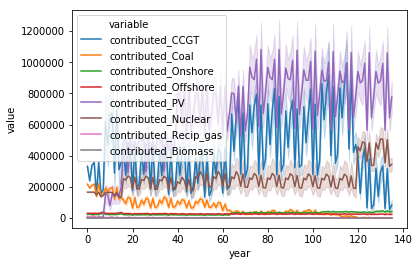

{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}


In [ ]:
joined_df_long = joined_df.reset_index().filter(regex="contributed_|Unnamed|index").melt(id_vars=['Unnamed: 0', 'index'])
joined_df_long = joined_df_long.rename({"Unnamed: 0":"year"}, axis=1)
joined_df_long
# g = sns.FacetGrid(data = joined_df_long, col='index')
# g.map(sns.lineplot, x="year", hue='variable', y='value')
# joined_df_long
for name, df in joined_df_long.groupby('index'):
    print(name)
    sns.lineplot(data=pd.DataFrame(df), x='year', hue='variable', y='value')
    plt.show()
    plt.close()